# ¿Cómo podemos predecir si un pasajero estará satisfecho o no después de volar en avión?

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<img src="https://aerolatinnews.com/wp-content/uploads/2014/05/Avianca-1-e1425908204958.png" width="300" align="center">
 <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0UevVB4zD_d3rKXFWd1EGUFuBibRuab8bxQ&usqp=CAU" width="370" align="center">

## Introducción

Partimos de una base de datos sobre una encuesta realizada a los pasajeros de una línea aérea cuya fecha no está especificada.

1) ¿Qué factores están altamente correlacionados con un pasajero satisfecho (o insatisfecho)?

2) ¿Cómo podemos predecir la satisfacción de los pasajeros?

In [ ]:
aerolineas = pd.read_csv('/content/gdrive/MyDrive/CoderHouse - Data Science/Airline Passenger Satisfaction/train.csv', index_col=0)

## Contenido

In [ ]:
aerolineas.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
aerolineas.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
aerolineas.shape

(103904, 24)

In [ ]:
aerolineas.describe().round(2)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,64924.21,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,37463.81,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32533.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64856.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97368.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [ ]:
aerolineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Tenemos las siguientes columnas:





*   **Gender:** 'Male' or 'Female'.
*   **Customer Type:** 'Loyal Customer' or 'Disloyal Customer'.
*   **Age:** La edad de los pasajeros encuestados.
*   **Type of Travel:** 'Personal Travel' or 'Business Travel'.
*   **Class:** 'Business', 'Eco' o 'Eco Plus'.
*   **Flight distance:** La distancia del viaje aéreo.
*   **Inflight wifi service:** El grado de satisfacción del servicio de wifi aéreo. (0: No Aplica; 1-5).
*   **Departure/Arrival time convenient:** El nivel de satisfacción sobre la partida y el arribo en el tiempo acordado.
*   **Ease of Online booking:** El nivel de satisfacción de la reserva online.

*   **Gate location:** El nivel de satisfacción sobre la ubicación de la puerta.
*   **Food and drink:** El nivel de satisfacción sobre la comida y bebida.
*   **Online boarding:** El grado de satisfacción sobre el embarque online.
*   **Seat comfort:** La calificación sobre la comodidad del asiento.
*   **Inflight entertainment:** El nivel de satisfacción sobre el entretenimiento aéreo.
*   **On-board service:** El grado de satisfacción sobre el servicio de a bordo.
*   **Leg room service:** El grado de satisfacción sobre el espacio para las piernas.
*   **Baggage handling:** La calificación sobre el manejo del equipaje.
*   **Check-in service:** La calificación sobre el servicio de check-in.
*   **Inflight service:** El nivel de satisfacción del servicio aéreo.
*   **Cleanliness:** La calificación sobre la limpieza.
*   **Departure Delay in Minutes:** Los minutos que se retrasó el avión cuando despegó.
*   **Arrival Delay in Minutes:** Los minutos que se retrasó el avión cuando llegó.
*   **Satisfaction:** 'Satisfaction' o 'Neutral or dissastisfaction'.

A partir de la base de datos obtenida, queremos generar un modelo que prediga si la satisfacción final de cada pasajero será positiva o neutral/negativa a partir de la calificación de varios servicios y características del vuelo.



## Análisis Exploratorio de Datos

Realizamos un gráfico de tortas para conocer la composición de los pasajeros encuestados satisfechos e insatisfechos. Vemos que la composición está balanceada.

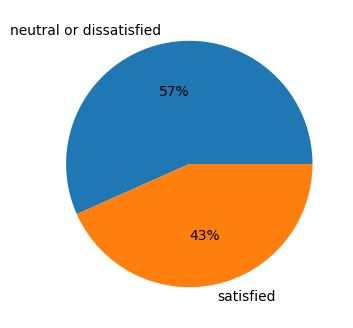

In [ ]:
fig,ax = plt.subplots(figsize =(6, 4))
ax.pie(aerolineas['satisfaction'].value_counts(), labels = aerolineas['satisfaction'].value_counts().index, autopct='%0.0f%%')
plt.show()

En el siguiente histograma vemos la composición de edades de las personas encuestadas.

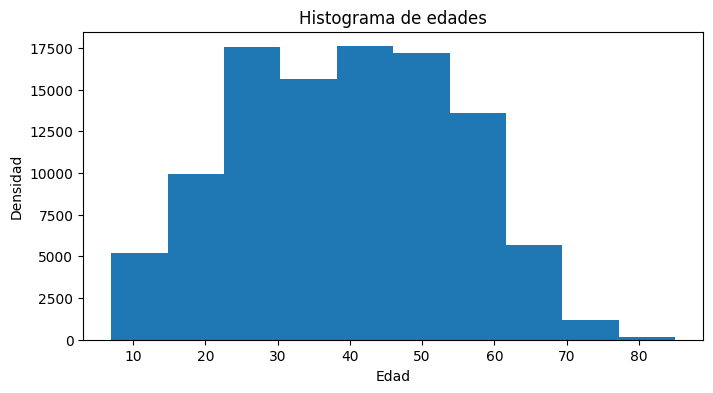

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(aerolineas['Age'].values.flatten(), bins=10)
ax.set_title('Histograma de edades')
ax.set_xlabel('Edad')
ax.set_ylabel('Densidad')
plt.show()

Es de útil información determinar si existe correlación lineal entre la demora en salir y al llegar el vuelo.

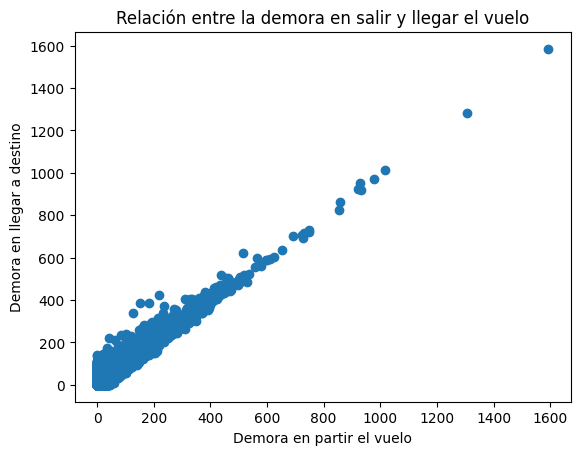

In [ ]:
fig, ax = plt.subplots()
ax.scatter(aerolineas['Departure Delay in Minutes'], aerolineas['Arrival Delay in Minutes'])
ax.set_title('Relación entre la demora en salir y llegar el vuelo')
ax.set_xlabel('Demora en partir el vuelo')
ax.set_ylabel('Demora en llegar a destino')
plt.show()

En el siguiente mapa de calor podemos ver qué variables se correlacionan más fuertes con otras. Comprobamos lo visto en el scatterplot anterior: hay una fuerte correlación entre la demora en despegar y aterrizar cada vuelo.

También existe correlación entre la facilidad para reservar pasajes online y el servicio de wifi en el avión, pero podría ser una casualidad.

Otras variables con correlación moderada son la calidad percibida por los pasajeros en el servicio de comida y bebida, en la comodidad del asiento y en el entretenimiento aéreo con la limpieza en el avión.

<ipython-input-12-0ca14f1f2ff4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerolineas.corr(), annot=True)


<Axes: >

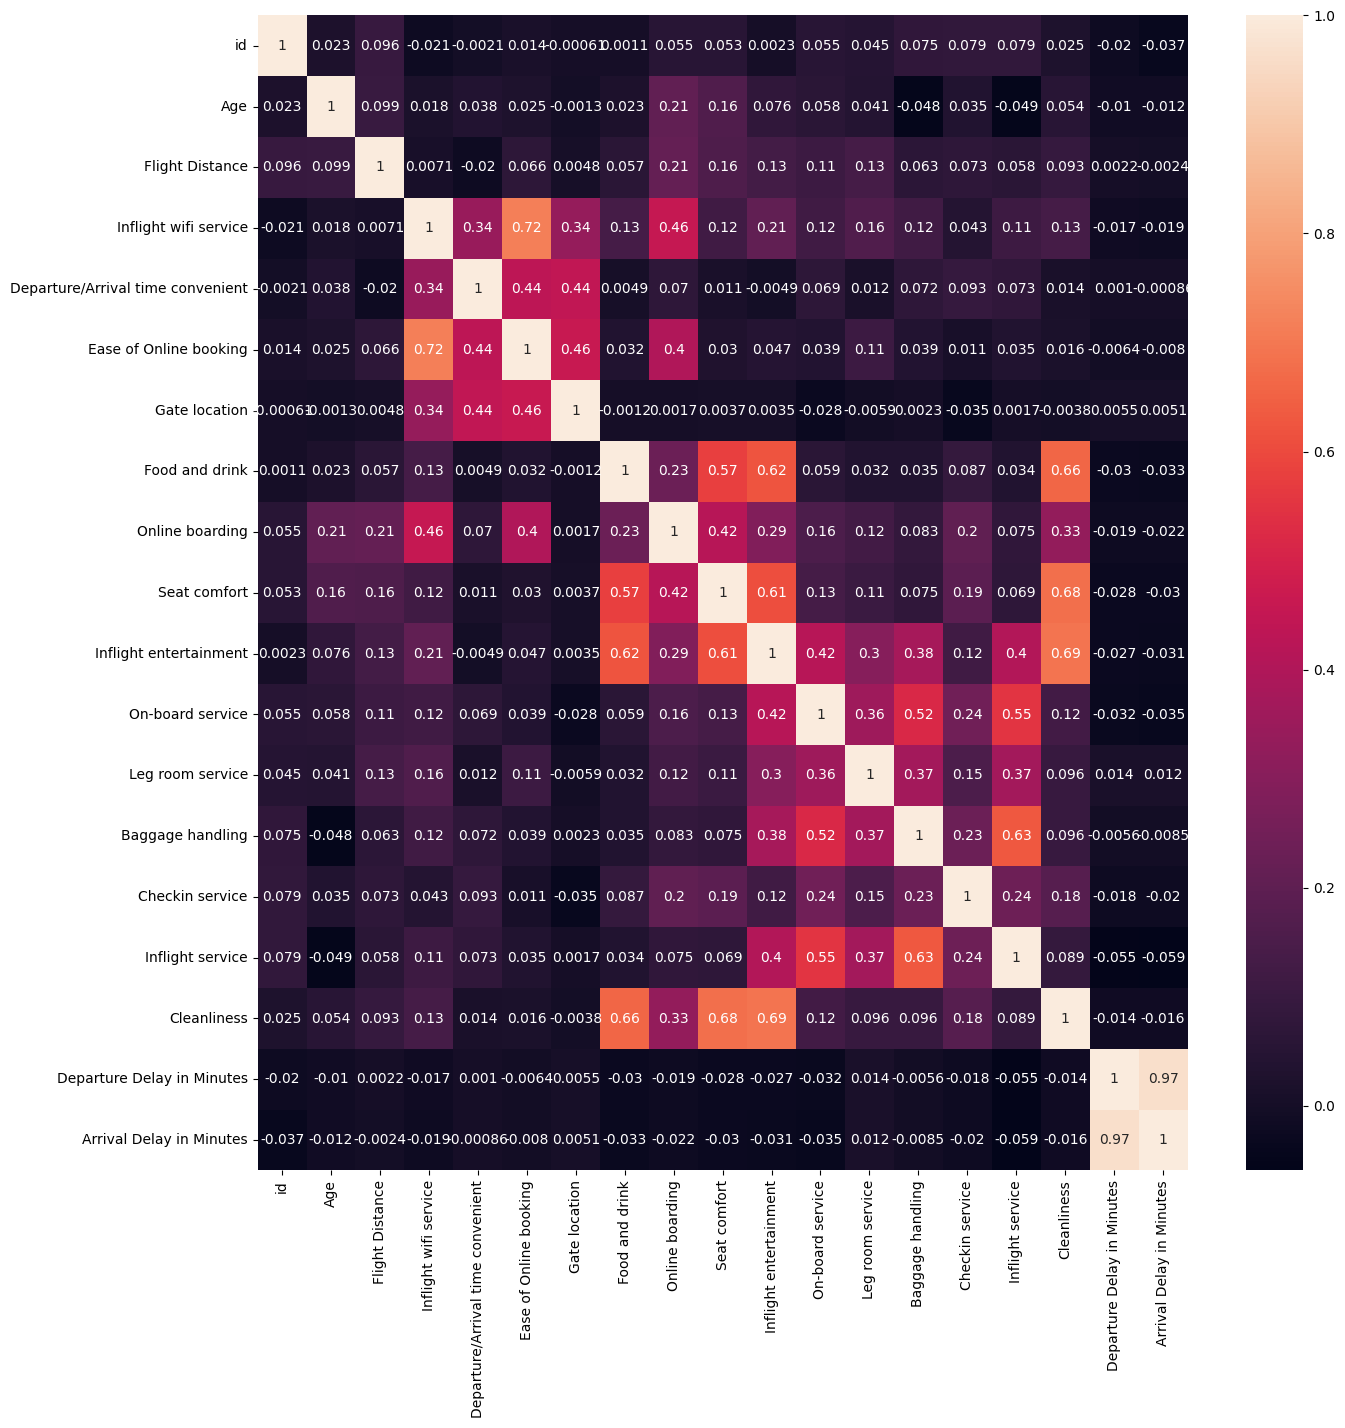

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(aerolineas.corr(), annot=True)

La distribución de edades también podemos representarla en los siguientes gráficos:

<ipython-input-13-25e90779a238>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aerolineas['Age'])


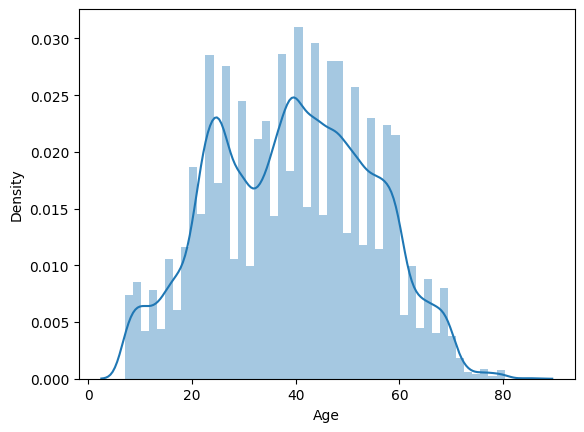

In [ ]:
sns.distplot(aerolineas['Age'])
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

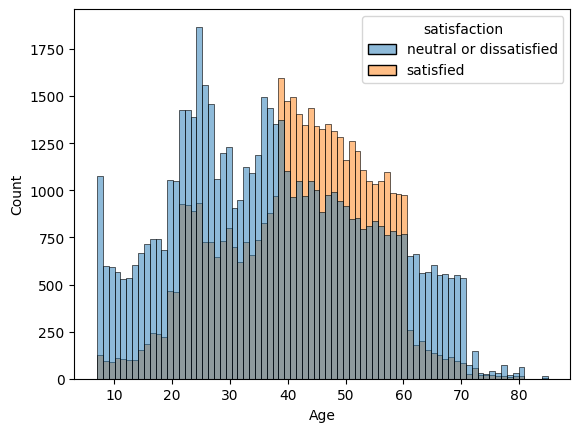

In [ ]:
sns.histplot(data = aerolineas, x = 'Age', hue = 'satisfaction')

### Categorías de Pasaje Aéreo

La puntuación final de cada pasajero podría variar de acuerdo a qué clase eligieron para viajar.

Teniendo en cuenta la influencia que puede tener esta variable, vemos como está compuesto el dataset en las 3 categorías de pasaje aéreo.

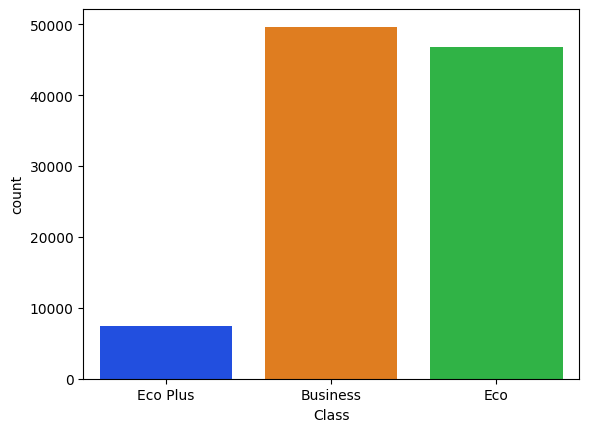

In [ ]:
sns.countplot(x='Class',data=aerolineas,palette='bright')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


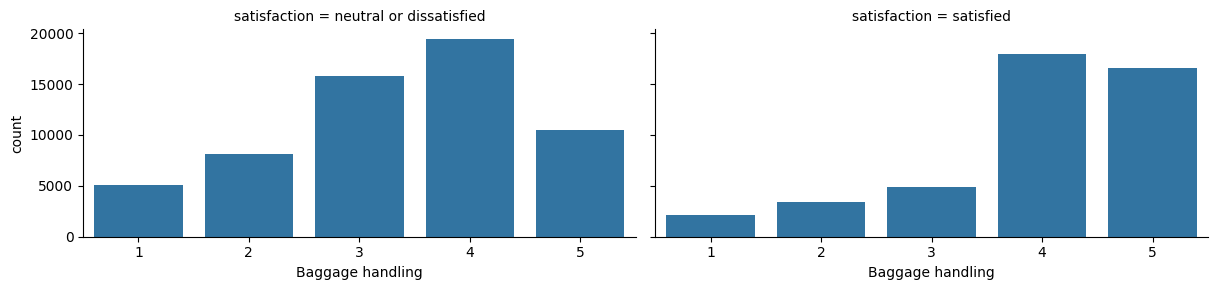

In [ ]:
df1 = pd.DataFrame({'count': aerolineas.groupby(['satisfaction','Baggage handling']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='satisfaction', margin_titles=True, col_wrap=3, aspect=2, row_order=aerolineas['satisfaction'].unique)
chart.map(sns.barplot, 'Baggage handling', 'count')

Del gráfico anterior, podemos decir que cuando el equipaje lo manejan de mala manera (calificación menor a 3), tenemos mayor cantidad de clientes insatisfechos.

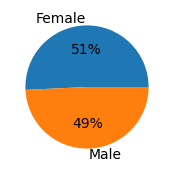

In [ ]:
fig,ax = plt.subplots(figsize =(2, 2))
plt.pie(aerolineas['Gender'].value_counts(), labels = aerolineas['Gender'].value_counts().index, autopct='%0.0f%%')
plt.show()

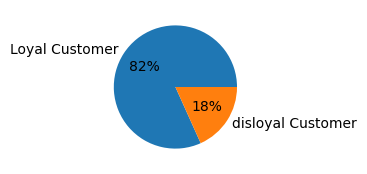

In [ ]:
fig,ax = plt.subplots(figsize =(2, 2))
plt.pie(aerolineas['Customer Type'].value_counts(), labels = aerolineas['Customer Type'].value_counts().index, autopct='%0.0f%%')
plt.show()

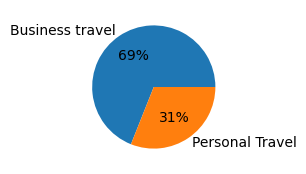

In [ ]:
fig,ax = plt.subplots(figsize =(2, 2))
plt.pie(aerolineas['Type of Travel'].value_counts(), labels = aerolineas['Type of Travel'].value_counts().index, autopct='%0.0f%%')
plt.show()

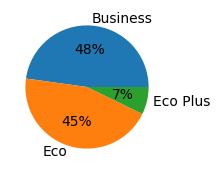

In [ ]:
fig,ax = plt.subplots(figsize =(2, 2))
plt.pie(aerolineas['Class'].value_counts(), labels = aerolineas['Class'].value_counts().index, autopct='%0.0f%%')
plt.show()

La clase Eco tiene más pasajeros insatisfechos o neutros que el resto.
La clase Business tiene más clientes satisfechos que el resto.

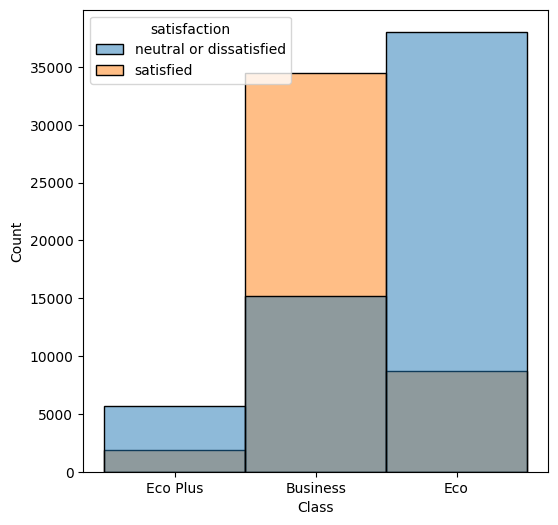

In [ ]:
fig, axes = plt.subplots(figsize = (6, 6))
sns.histplot(x = 'Class', data = aerolineas, hue = 'satisfaction', discrete = True);
plt.show()

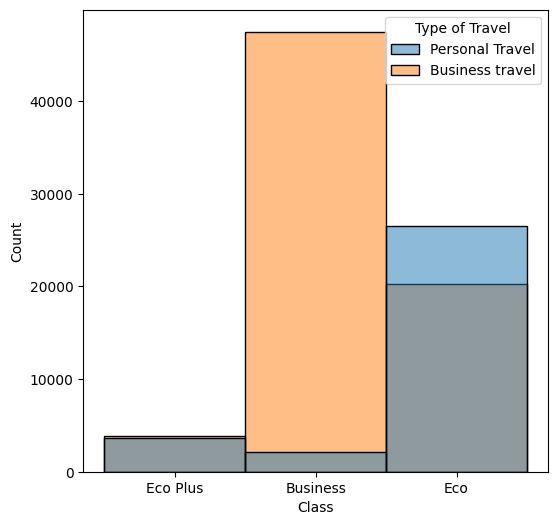

In [ ]:
fig, axes = plt.subplots(figsize = (6, 6))
sns.histplot(x = 'Class', data = aerolineas, hue = 'Type of Travel', discrete = True);
plt.show()

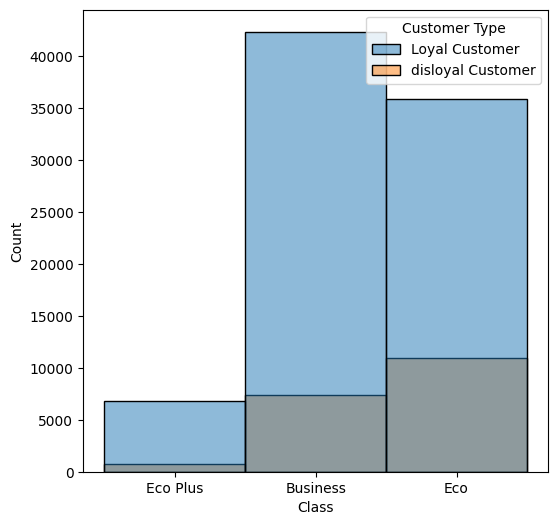

In [ ]:
fig, axes = plt.subplots(figsize = (6, 6))
sns.histplot(x = 'Class', data = aerolineas, hue = 'Customer Type', discrete = True);
plt.show()

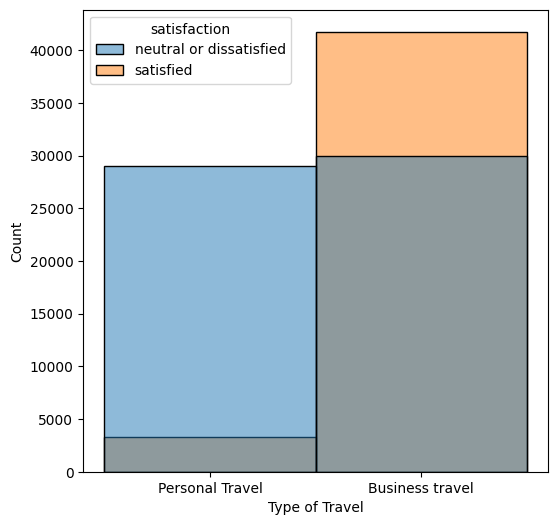

In [ ]:
fig, axes = plt.subplots(figsize = (6, 6))
sns.histplot(x = 'Type of Travel', data = aerolineas, hue = 'satisfaction', discrete = True);
plt.show()

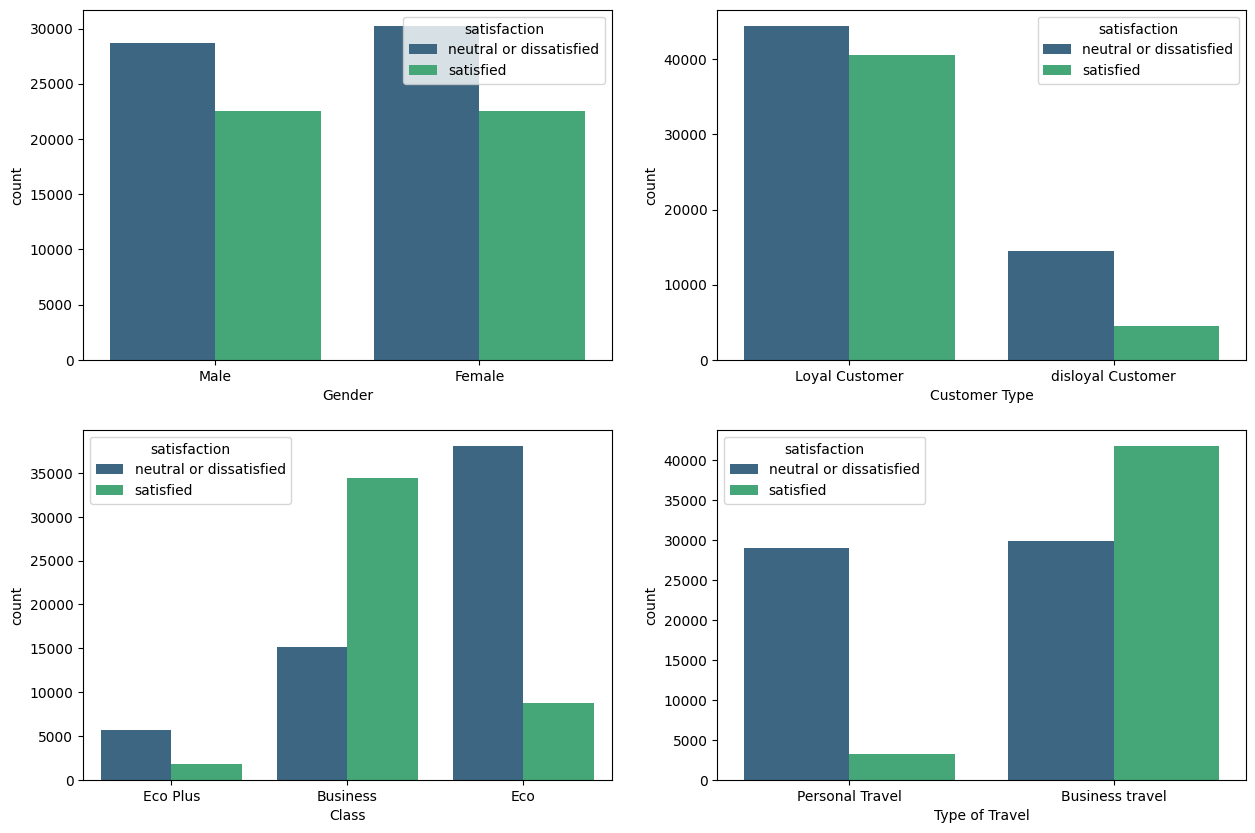

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
sns.countplot(x = 'Gender', data = aerolineas, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = aerolineas, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Class', data = aerolineas, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Type of Travel', data = aerolineas, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);

A continuación, podemos ver que los servicios de comida y bebida tienen casi la misma calificación de 2, 3, 4 y 5.
En cambio, el servicio wifi y la facilidad de hacer booking online recibieron mala calificación la mayoría de las veces.

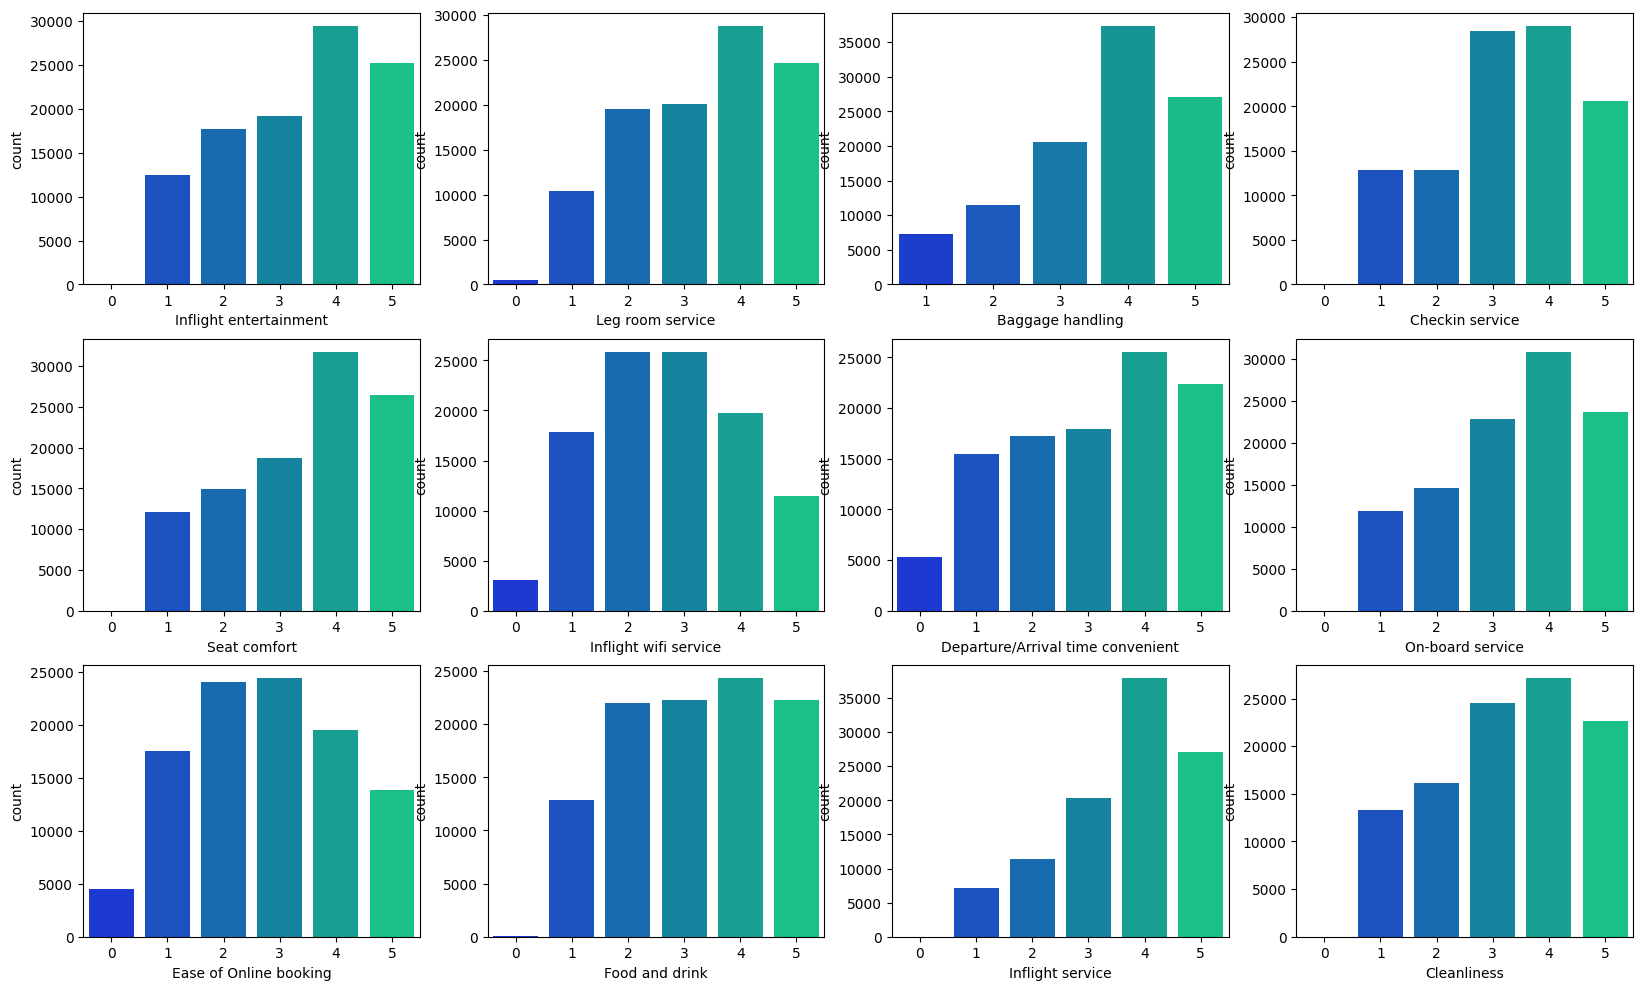

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Inflight entertainment', data = aerolineas, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Leg room service', data = aerolineas, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Baggage handling', data = aerolineas, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Checkin service', data = aerolineas, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Seat comfort', data = aerolineas, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = aerolineas, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = aerolineas, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = aerolineas, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = aerolineas, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = aerolineas, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = aerolineas, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = aerolineas, palette= 'winter', ax = axes[2, 3]);

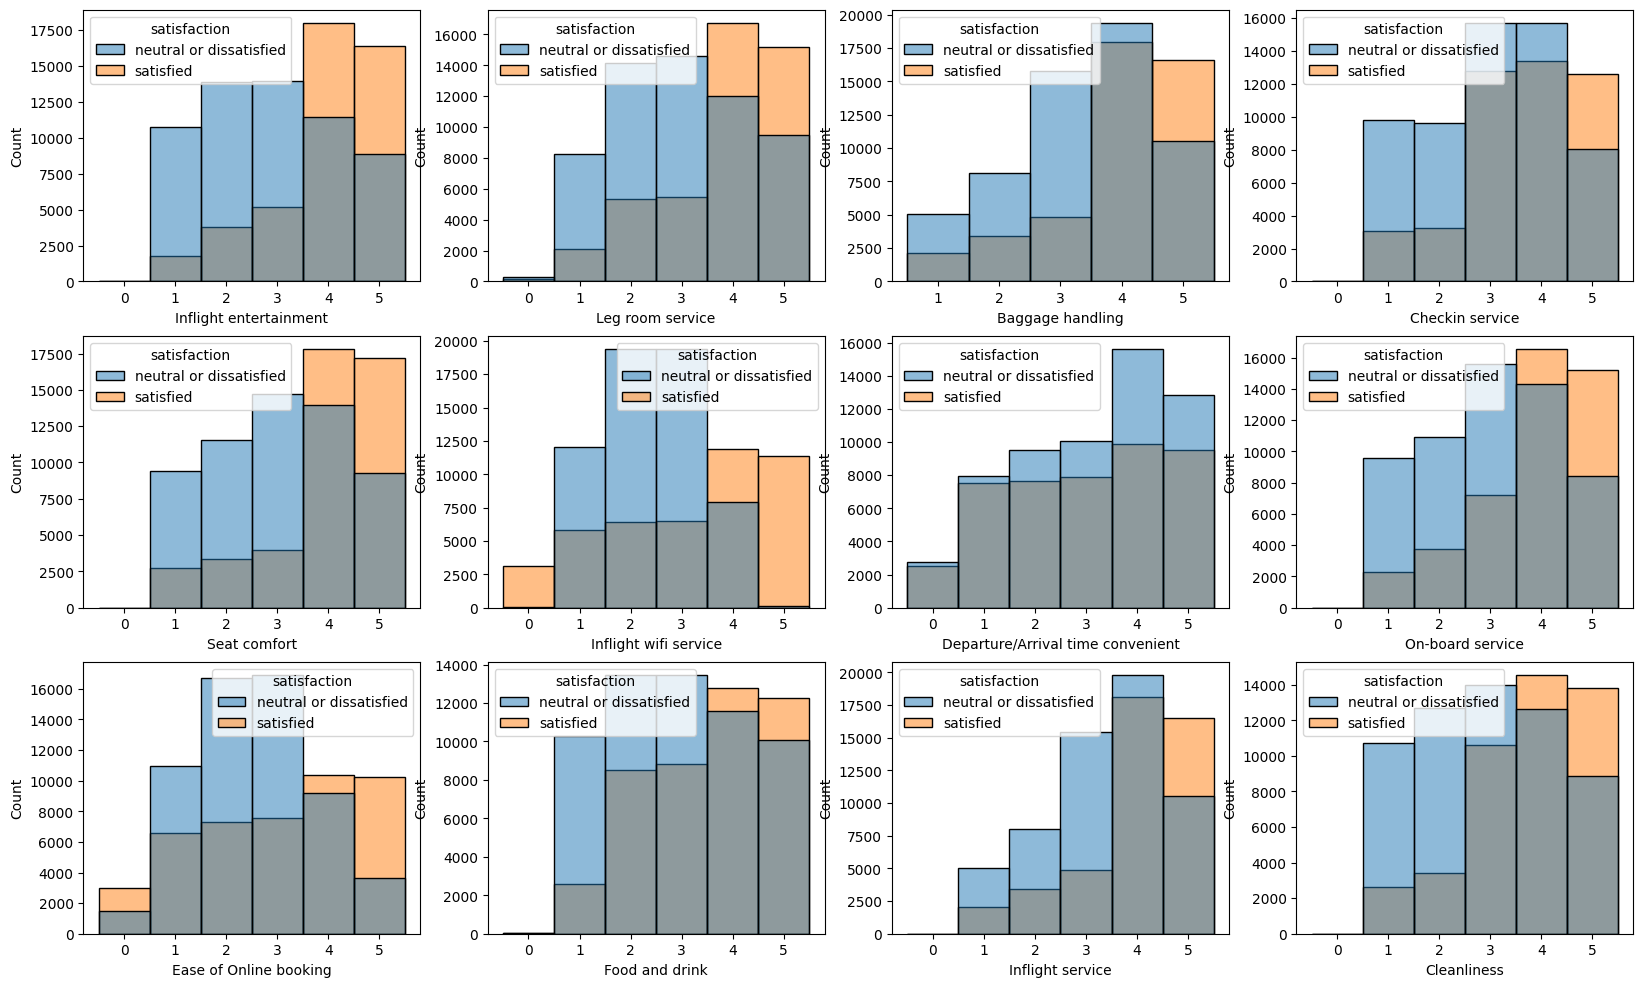

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.histplot(x = 'Inflight entertainment', data = aerolineas, ax = axes[0, 0], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Leg room service', data = aerolineas, ax = axes[0, 1], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Baggage handling', data = aerolineas, ax = axes[0, 2], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Checkin service', data = aerolineas, ax = axes[0, 3], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Seat comfort', data = aerolineas, ax = axes[1, 0], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Inflight wifi service', data = aerolineas, ax = axes[1, 1], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Departure/Arrival time convenient', data = aerolineas, ax = axes[1, 2], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'On-board service', data = aerolineas, ax = axes[1, 3], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Ease of Online booking', data = aerolineas, ax = axes[2, 0], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Food and drink', data = aerolineas, ax = axes[2, 1], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Inflight service', data = aerolineas, ax = axes[2, 2], hue = 'satisfaction', discrete = True);
sns.histplot(x = 'Cleanliness', data = aerolineas, ax = axes[2, 3], hue = 'satisfaction', discrete = True);

## Limpieza de Datos

In [ ]:
aerolineas.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Completamos los valores faltantes de la columna "Arrival Delay in Minutes" con la mediana:

In [ ]:
median_val = aerolineas['Arrival Delay in Minutes'].median()
aerolineas['Arrival Delay in Minutes'] = aerolineas['Arrival Delay in Minutes'].fillna(median_val)

Definimos las columnas que son categóricas:

In [ ]:
cat_cols_temp = ['id', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [ ]:
aerolineas[cat_cols_temp] = aerolineas[cat_cols_temp].astype(object)

Las columnas "Departure Delay in Minutes" y "Arrival Delay in Minutes" están fuertemente relacionadas, por lo tanto nos quedamos con 1 sola: "Arrival Delay in Minutes":

In [ ]:
aerolineas.drop('Departure Delay in Minutes', axis=1, inplace=True)

Eliminamos la columna "id" porque no nos sirve para analizar:

In [ ]:
aerolineas.drop('id', axis= 1, inplace= True)

Vemos cómo queda la base de datos:

In [ ]:
aerolineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

In [ ]:
cat_columns = aerolineas.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = aerolineas.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Arrival Delay in Minutes']


In [ ]:
aerolineas[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

Algunos valores faltantes en las columnas categóricas están representados por 0. Lo reemplazamos por la moda de esas columnas:

In [ ]:
columns_with_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
moda = aerolineas[columns_with_0].mode()
aerolineas[columns_with_0] = aerolineas[columns_with_0].replace({'0': moda})

##Feature Transformation

La columna "Flight Distance" tiene datos sesgados, por lo tanto aplicamos una transformación logarítmica:

In [ ]:
aerolineas['Flight Distance'] = np.log1p(aerolineas['Flight Distance'])

## One Hot Encoding

Generamos dummies para las features: Gender, Customer Type, Type of Travel y Class:

In [ ]:
from sklearn import preprocessing

hot_encoder = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

#Inicio
one_hot_encoder = preprocessing.OneHotEncoder(sparse=False)

#Ajustar y aplicar la codificación one-hot al DataFrame

data_encoded = pd.DataFrame(one_hot_encoder.fit_transform(aerolineas[hot_encoder]))

nombres_columnas = one_hot_encoder.get_feature_names_out(hot_encoder)
data_encoded.columns = nombres_columnas

#Combinar las columnas codificadas con el DataFrame original
data_encoded = pd.concat([aerolineas.drop(hot_encoder, axis=1), data_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,6.133398,3,4,3,1,5,3,5,5,...,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,5.463832,3,2,3,3,1,3,1,1,...,neutral or dissatisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,7.041412,2,2,2,2,5,5,5,5,...,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,6.333280,2,5,5,5,2,2,2,2,...,neutral or dissatisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,5.370638,3,3,3,3,4,5,5,3,...,satisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
data_encoded.shape

(103904, 27)

## Feature Scaling

Aplicamos StandardScaler para reescalar las variables numéricas y algunas categóricas:

In [ ]:
encoder = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [ ]:
list(num_columns).extend(encoder)

In [ ]:
num_columns

['Age', 'Flight Distance', 'Arrival Delay in Minutes']

In [ ]:
# Definir standard scaler

scaler = preprocessing.StandardScaler()

# Transformar la data

scaled = scaler.fit_transform(data_encoded[num_columns])
print(scaled[0:5,:])

[[-1.7452793  -0.62495265  0.07416916]
 [-0.95136024 -1.35625108 -0.23631279]
 [-0.88520032  0.36677738 -0.39155376]
 [-0.95136024 -0.40664252 -0.1586923 ]
 [ 1.43039694 -1.45803707 -0.39155376]]


In [ ]:
var_categoricas = data_encoded.select_dtypes(include=['object']).columns
print(var_categoricas)

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')


In [ ]:
[x for x in data_encoded.columns if x not in num_columns]

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction',
 'Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [ ]:
data_scaled = pd.concat([pd.DataFrame(scaled, columns=num_columns), data_encoded[[x for x in data_encoded.columns if x not in num_columns]]], axis=1)
data_scaled.head()

,Age,Flight Distance,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.624953,0.074169,3,4,3,1,5,3,5,...,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.951360,-1.356251,-0.236313,3,2,3,3,1,3,1,...,neutral or dissatisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,-0.885200,0.366777,-0.391554,2,2,2,2,5,5,5,...,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.951360,-0.406643,-0.158692,2,5,5,5,2,2,2,...,neutral or dissatisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.430397,-1.458037,-0.391554,3,3,3,3,4,5,5,...,satisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Train Test Split

In [ ]:
X = data_encoded.drop('satisfaction', axis=1)
y = data_encoded['satisfaction']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1234)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.89


In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.895


In [ ]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.93      0.91     11856
              satisfied       0.90      0.85      0.87      8925

               accuracy                           0.89     20781
              macro avg       0.90      0.89      0.89     20781
           weighted avg       0.89      0.89      0.89     20781



# Elegimos un K valor

In [ ]:
accuracy = []
for i in range(1, 15):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_i = accuracy_score(y_test, pred_i)
  accuracy.append(accuracy_i)

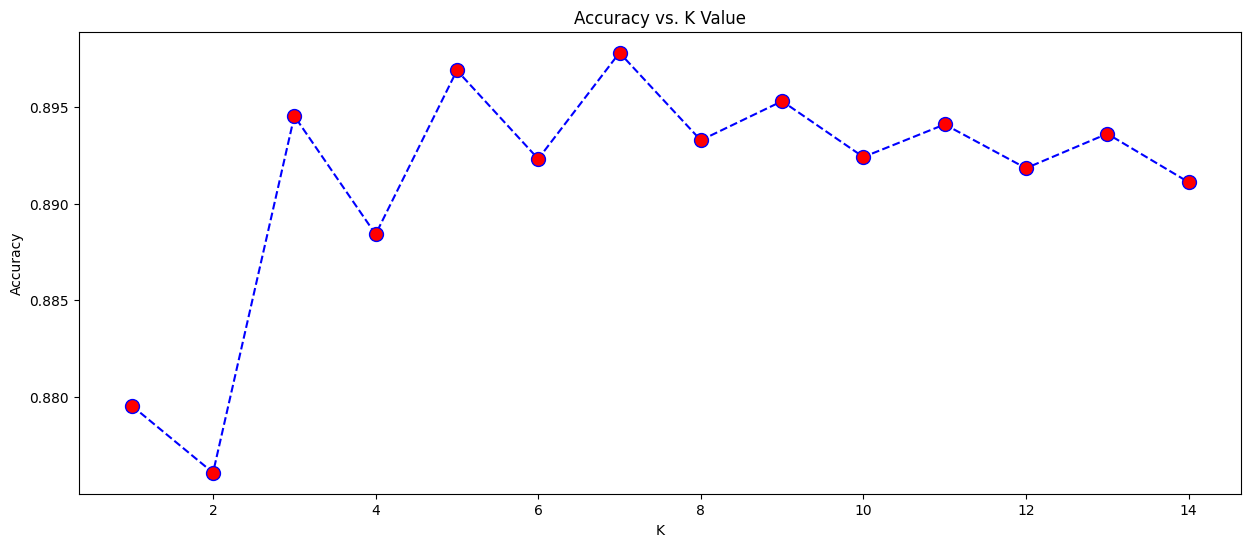

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1, 15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

La máxima precisión ocurre cuando k = 7, vamos a reentrenar el modelo para k=7.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluación del modelo KNN

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 89.78%


In [ ]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.94      0.91     11856
              satisfied       0.91      0.84      0.88      8925

               accuracy                           0.90     20781
              macro avg       0.90      0.89      0.89     20781
           weighted avg       0.90      0.90      0.90     20781



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

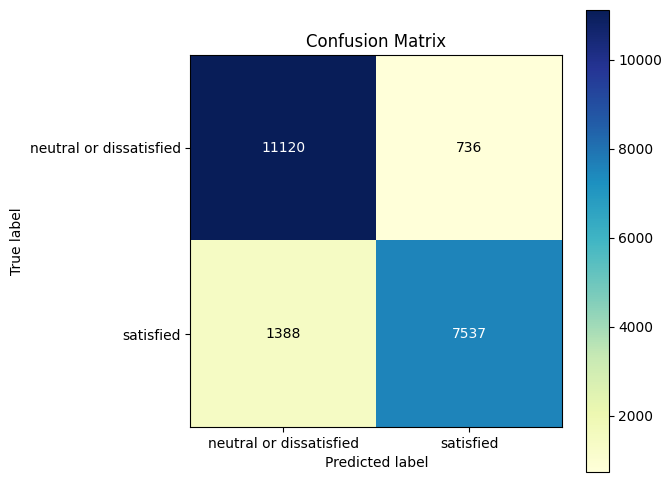

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6, 6), cmap= 'YlGnBu')

In [ ]:
def plot_roc_auc2(model, X_test, y_test, y_pred=None):
    if y_pred is None:
        y_pred = model.predict_proba(X_test)[:, 1]  # Use the predicted probabilities of the positive class

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, thresholds

In [ ]:
y_test2 = y_test.replace({"satisfied":1, "neutral or dissatisfied":0})

(array([0.        , 0.00531377, 0.01585695, 0.03205128, 0.06207827,
        0.11023954, 0.20242915, 0.40418354, 1.        ]),
 array([0.        , 0.58352941, 0.69490196, 0.77747899, 0.84448179,
        0.89254902, 0.93803922, 0.97658263, 1.        ]),
 array([2.        , 1.        , 0.85714286, 0.71428571, 0.57142857,
        0.42857143, 0.28571429, 0.14285714, 0.        ]))

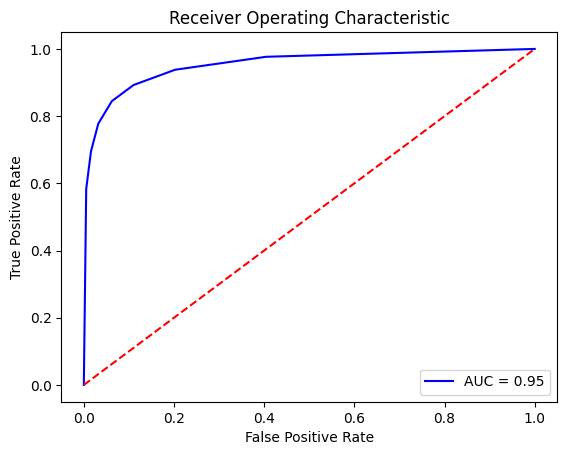

In [ ]:
plot_roc_auc2(knn, X_test, y_test2, y_pred=None)

# Logistic Regression

Probamos ahora con Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Evaluación:

acc = accuracy_score(y_test, lr.predict(X_test))
acc

0.8681006688802271

In [ ]:
def plot_roc_auc(model, X_test, y_test, y_pred=None):
  if(y_pred is None):
    y_pred =  model.decision_function(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  roc_auc = auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  return fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99797571, 0.99797571,
        1.        ]),
 array([0.00000000e+00, 1.12044818e-04, 5.32212885e-02, ...,
        9.99887955e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 6.76028033,  5.76028033,  3.88671227, ..., -6.48366316,
        -6.48724731, -9.76032689]))

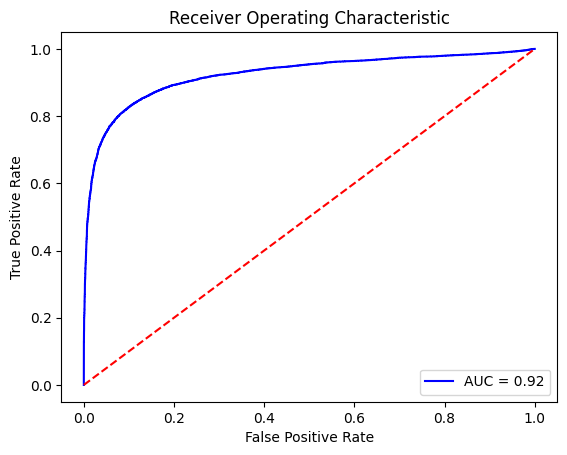

In [ ]:
plot_roc_auc(lr, X_test, y_test2, y_pred=None)

Nos quedamos con el modelo KNN que nos dio mejor resultado en accuracy y mejor AUC: 0.95.

# Desafio APIs

In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
# Pongo abajo el código que está aprobado

In [ ]:
pip install tabulate

In [ ]:
import requests
import json
from tabulate import tabulate

# URL de la API de OpenSky
url = "https://opensky-network.org/api/states/all"

# Realizar una solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario Python
    data = json.loads(response.text)

    # Verificar si la respuesta contiene datos de vuelo
    if "states" in data:
        # Mostrar algunos datos de vuelo (por ejemplo, los primeros 5)
        for flight in data["states"][:5]:
            callsign = flight[1]
            icao24 = flight[0]
            origin_country = flight[2]
            print(f"Vuelo: {callsign}, ICAO24: {icao24}, País de origen: {origin_country}")
    else:
        print("No se encontraron datos de vuelo en la respuesta.")
else:
    print(f"Error al hacer la solicitud GET. Código de estado: {response.status_code}")

Vuelo: AAL1086 , ICAO24: ac96b8, País de origen: United States
Vuelo: ZKGCW   , ICAO24: c822aa, País de origen: New Zealand
Vuelo: SKW3630 , ICAO24: a2e5ec, País de origen: United States
Vuelo: AIQ3229 , ICAO24: 88044a, País de origen: Thailand
Vuelo: JST261  , ICAO24: 7c6b2d, País de origen: Australia


In [ ]:
import requests
import json
from tabulate import tabulate

# URL de la API de OpenSky
url = "https://opensky-network.org/api/states/all"

# Realizar una solicitud GET a la API
response = requests.get(url)


# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario Python
    data = json.loads(response.text)

    # Verificar si la respuesta contiene datos de vuelo
    if "states" in data:
       flight_data = []
        # Mostrar algunos datos de vuelo (por ejemplo, los primeros 5)
       for flight in data["states"][:5]:
            callsign = flight[1]
            icao24 = flight[0]
            origin_country = flight[2]
            flight_data.append([callsign, icao24, origin_country])
            # Definir encabezados de la tabla
            headers = ["Vuelo","ICAO24","País de origen"]
     # Imprimir la tabla
            print(tabulate(flight_data, headers=headers, tablefmt="grid"))
    else:
        print("No se encontraron datos de vuelo en la respuesta.")
else:
    print(f"Error al hacer la solicitud GET. Código de estado: {response.status_code}")

+---------+----------+------------------+
| Vuelo   | ICAO24   | País de origen   |
+=========+==========+==================+
| AAL1086 | ac96b8   | United States    |
+---------+----------+------------------+
+---------+----------+------------------+
| Vuelo   | ICAO24   | País de origen   |
+=========+==========+==================+
| AAL1086 | ac96b8   | United States    |
+---------+----------+------------------+
| ZKGCW   | c822aa   | New Zealand      |
+---------+----------+------------------+
+---------+----------+------------------+
| Vuelo   | ICAO24   | País de origen   |
+=========+==========+==================+
| AAL1086 | ac96b8   | United States    |
+---------+----------+------------------+
| ZKGCW   | c822aa   | New Zealand      |
+---------+----------+------------------+
| SKW3630 | a2e5ec   | United States    |
+---------+----------+------------------+
+---------+----------+------------------+
| Vuelo   | ICAO24   | País de origen   |
+=========+==========+============